In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')

In [3]:
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [7]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

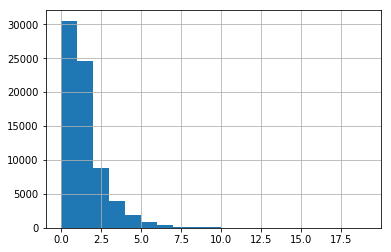

In [13]:
df.delay.hist(bins=19)

In [14]:
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

In [16]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [36]:
df['direction'].unique()

array(['Kopiec Wandy', 'Walcownia', 'Czerwone Maki P+R', 'Wzgórza K.',
       'Bronowice Małe', 'Salwator', 'Mały Płaszów', 'Os.Piastów',
       'Mistrzejowice', 'Bronowice', 'Kurdwanów P+R', 'Nowy Bieżanów P+R',
       'Krowodrza Górka', 'Cichy Kącik', 'Borek Fałęcki', 'Dworzec Tow.',
       'Prokocim', 'Łagiewniki', 'Cm. Rakowicki', 'Kombinat',
       'Plac Centralny im.R.Reagana'], dtype=object)

In [70]:
df['delay_secs'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

def gen_id_num_direction(x):
    return '{} {}'.format(x['number'], x['direction'])
                          
df['number_direction_id'] = df.apply(gen_id_num_direction, axis=1).factorize()[0]


def gen_id_stop_direction(x):
    return '{} {}'.format(x['stop'], x['direction'])

df['stop_direction_id'] = df.apply(gen_id_stop_direction, axis=1).factorize()[0]

feats = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id',
]

X = df[feats].values
y = df['delay_secs'].values

In [71]:
model = RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=5)

In [74]:
model = DecisionTreeRegressor(max_depth=10, random_state=0)

In [76]:
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.911446275525776, 2.5252312592564357)